<a href="https://colab.research.google.com/github/rubencg195/ML_Course_6915/blob/master/Assignment_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data

In [2]:
!wget "http://ufldl.stanford.edu/housenumbers/train_32x32.mat" 

--2019-03-27 18:43:11--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  10.1MB/s    in 17s     

2019-03-27 18:43:34 (10.0 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



In [3]:
!wget "http://ufldl.stanford.edu/housenumbers/test_32x32.mat" 

--2019-03-27 18:43:36--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  8.73MB/s    in 6.9s    

2019-03-27 18:43:43 (8.91 MB/s) - ‘test_32x32.mat’ saved [64275384/64275384]



In [4]:
!wget "http://ufldl.stanford.edu/housenumbers/extra_32x32.mat" 

--2019-03-27 18:43:45--  http://ufldl.stanford.edu/housenumbers/extra_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1329278602 (1.2G) [text/plain]
Saving to: ‘extra_32x32.mat’

extra_32x32.mat     100%[===================>]   1.24G  11.6MB/s    in 1m 59s  

2019-03-27 18:45:43 (10.7 MB/s) - ‘extra_32x32.mat’ saved [1329278602/1329278602]



# Import Librares

In [5]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
# from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

print(tf.__version__)

Using TensorFlow backend.


1.13.1


# Data Pre-processing

In [0]:
from scipy.io import loadmat

train_set = loadmat('train_32x32.mat')
test_set = loadmat('test_32x32.mat')

train_images = np.array(train_set["X"])
train_labels = np.array(train_set["y"])

test_images = np.array(test_set["X"])
test_labels = np.array(test_set["y"])

In [7]:
#train_images.shape
train_labels.shape

(73257, 1)

In [8]:
train_temp = list()
test_temp = list()
for i in range(train_labels.shape[0]):
  train_temp.append(train_images[:,:,:,i]/255)
for i in range(test_labels.shape[0]):
  test_temp.append(test_images[:,:,:,i]/255)
train_images = np.array(train_temp)
test_images  = np.array(test_temp)
train_images.shape


(73257, 32, 32, 3)

In [9]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example

train_labels_enconded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)

print(train_labels[0], "\n", train_labels_enconded[0])

[1] 
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Data Visualization

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


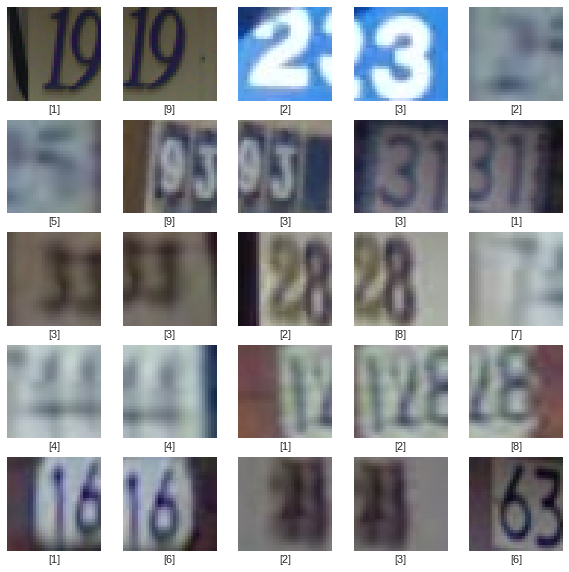

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Build Model

In [0]:
class BaseModel():
  def __init__(self, model, title):
    self.title = title
    self.model = model
    self.model.compile(optimizer='adam', 
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    print("Creating Model: ", self.title)
    
  def train(self, train_images, train_labels_enconded ):
    print("Training: ", self.title)
    self.history = self.model.fit(train_images, train_labels_enconded, epochs=5, batch_size=32)
    
    # Plot training & validation accuracy values
    plt.plot(self.history.history['acc'])
    # plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(self.history.history['loss'])
    # plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
            
  def test(self, test_images, test_labels_encoded):
    print("Testing: ", self.title)
    self.model.evaluate(test_images, test_labels_encoded, batch_size=128)
    
  def save(self, model_filename):
    self.model.save_weights(model_filename)
    from google.colab import files
    files.download(model_filename) 
    print("Saving ", self.title ," to : ", model_filename)

In [0]:
class CustomNN(BaseModel):
  def __init__(self):
    num_classes = 11
    self.model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32, 32, 3)),
        keras.layers.Dense(2048, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)),
        keras.layers.Dense(num_classes, activation=tf.nn.softmax, kernel_regularizer=regularizers.l2(0.01))
    ])
    BaseModel.__init__(self, self.model, "Neural Network")

In [0]:
class CustomCNN(BaseModel):
  def __init__(self):
    num_classes = 11
    self.model = keras.Sequential([
      keras.layers.Conv2D(32, kernel_size=(3, 3),
                       activation='relu',
                       input_shape=(32, 32, 3)),
      keras.layers.MaxPooling2D(pool_size=(2, 2)),
      keras.layers.Conv2D(64, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D(pool_size=(2, 2)),
      keras.layers.Dropout(0.25),
      keras.layers.Flatten(),
      keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01)),
    ])
    BaseModel.__init__(self, self.model, "Convolutional Neural Network")

# Train NN

In [23]:
nn = CustomNN()

Creating Model:  Neural Network


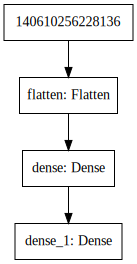

In [15]:
SVG(model_to_dot(nn.model).create(prog='dot', format='svg'))

Training:  Neural Network
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
73257/73257 [==============================] - 299s 4ms/sample - loss: 2.9586 - acc: 0.1753
Epoch 2/5
73257/73257 [==============================] - 292s 4ms/sample - loss: 2.2526 - acc: 0.1882
Epoch 3/5
73257/73257 [==============================] - 293s 4ms/sample - loss: 2.2434 - acc: 0.1888
Epoch 4/5
73257/73257 [==============================] - 293s 4ms/sample - loss: 2.2388 - acc: 0.1891
Epoch 5/5
73257/73257 [==============================] - 299s 4ms/sample - loss: 2.2375 - acc: 0.1892


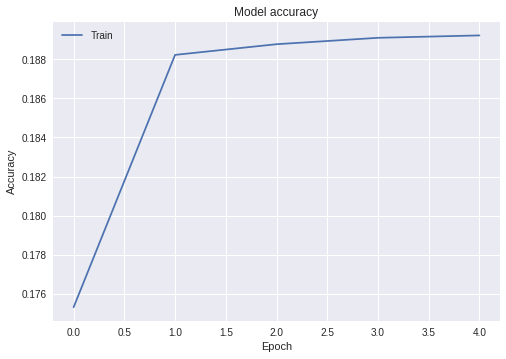

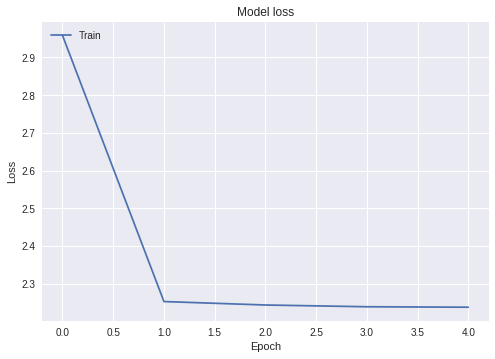

In [16]:
nn.train(train_images, train_labels_enconded )

# Test NN

In [17]:
nn.test(test_images, test_labels_encoded)

Testing:  Neural Network
26032/26032 [==============================] - 11s 435us/sample - loss: 2.2244 - acc: 0.1959


In [18]:
nn.save("NN_model.h5")

Saving  Neural Network  to :  NN_model.h5


In [0]:
nn_predictions = nn.model.predict(test_images)

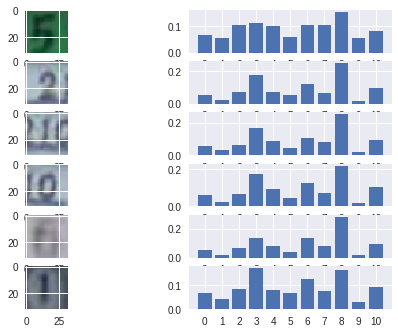

In [82]:
counter = 0
x = np.arange(11)
plt.plot([6,2])

counter = 1
for i in range(6):
  plt.subplot(6, 2, counter )
  plt.imshow(test_images[i])
  counter = counter + 1
  
  plt.subplot(6, 2, counter )
  plt.bar(x , nn_predictions[i] )
  plt.xticks(x, x)
  counter = counter + 1

plt.show()

# TrainCNN

In [24]:
cnn = CustomCNN()

Creating Model:  Convolutional Neural Network


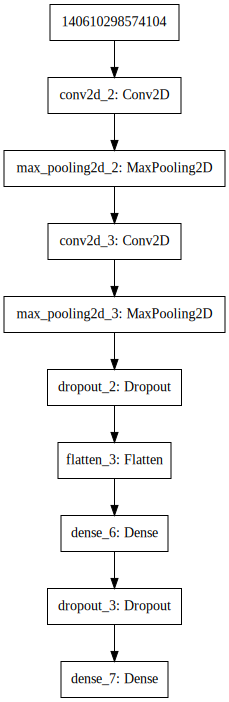

In [25]:
SVG(model_to_dot(cnn.model).create(prog='dot', format='svg'))

Training:  Convolutional Neural Network
Epoch 1/5
73257/73257 [==============================] - 187s 3ms/sample - loss: 1.7908 - acc: 0.5158
Epoch 2/5
73257/73257 [==============================] - 186s 3ms/sample - loss: 1.2073 - acc: 0.7388
Epoch 3/5
73257/73257 [==============================] - 187s 3ms/sample - loss: 1.1110 - acc: 0.7664
Epoch 4/5
73257/73257 [==============================] - 185s 3ms/sample - loss: 1.0673 - acc: 0.7770
Epoch 5/5
73257/73257 [==============================] - 185s 3ms/sample - loss: 1.0394 - acc: 0.7844


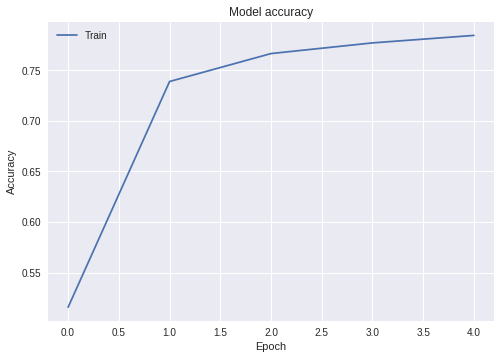

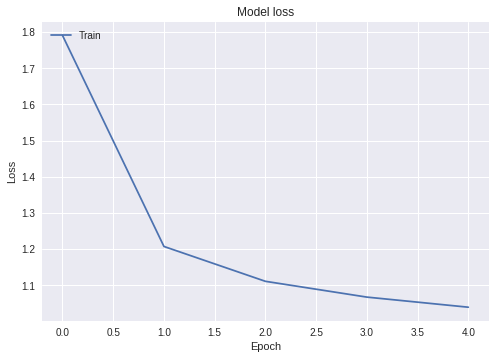

In [26]:
cnn.train(train_images, train_labels_enconded )

# Test CNN

In [28]:
cnn.test(test_images, test_labels_encoded)

Testing:  Convolutional Neural Network
26032/26032 [==============================] - 16s 632us/sample - loss: 0.9233 - acc: 0.8375


In [29]:
nn.save("CNN_model.h5")

Saving  Neural Network  to :  CNN_model.h5


In [0]:
cnn_predictions = cnn.model.predict(test_images)

In [76]:
cnn_predictions[0]

array([6.4617343e-05, 7.1433438e-03, 2.2273457e-03, 6.5827325e-02,
       8.3088893e-03, 7.9097480e-01, 6.3424274e-02, 9.4156098e-03,
       1.9164478e-02, 3.1835750e-02, 1.6135685e-03], dtype=float32)

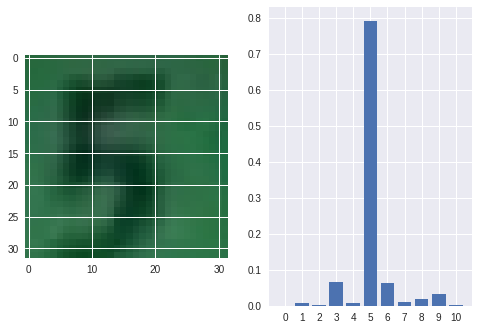

In [77]:
plt.plot([1,2])

plt.subplot(1, 2, 1 )
plt.imshow(test_images[0])
counter = counter + 1

plt.subplot(1, 2, 2 )
plt.bar(x , cnn_predictions[0] )
plt.xticks(x, x)
counter = counter + 1
plt.show()

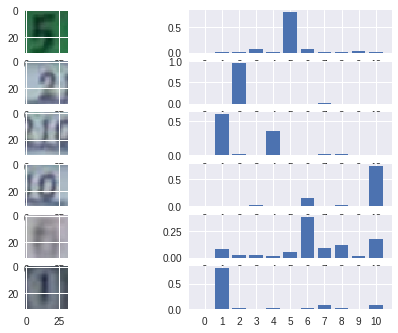

In [78]:
counter = 0
x = np.arange(11)
plt.plot([6,2])

counter = 1
for i in range(6):
  plt.subplot(6, 2, counter )
  plt.imshow(test_images[i])
  counter = counter + 1
  
  plt.subplot(6, 2, counter )
  plt.bar(x , predictions[i] )
  plt.xticks(x, x)
  counter = counter + 1

plt.show()